In [1]:
from math import pi
from numpy import *
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib import rcParams as MpRcParams
MpRcParams['mathtext.fontset'] = 'cm'
MpRcParams['mathtext.rm'] = 'serif'
%matplotlib inline

In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\maticpi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

# Gostota verjetnosti

Text(0.5, 0, '$x$')

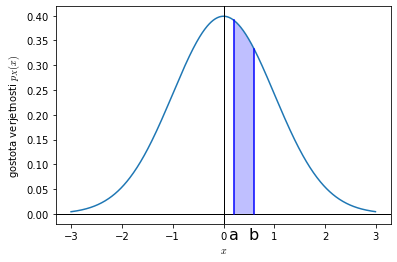

In [2]:
def px_normal(x,sigma,avg):
    return 1/(sigma*sqrt(2*pi))*exp(-1/2*((x-avg)/sigma)**2)
    
sigma=1
avg=0

#Izracunaj tabelo vrednosti za risanje grafa
X=arange(-3*sigma+avg,3*sigma+avg,0.01)
px=list()
for x in X:
    px.append(px_normal(x,sigma,avg))

#Risanje    
fig, ax = plt.subplots()
ax.plot(X,px)
a=0.2
b=0.6
ax.fill_between(X, px, 0, where=((X > a) & (X <= b)), facecolor='blue', alpha=0.25)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.plot([a,a],[0,px_normal(a,sigma,avg)], color='blue')
ax.plot([b,b],[0,px_normal(b,sigma,avg)], color='blue')
ax.annotate('a',xy=(a,0), xytext=(a-0.1,-0.05), fontsize=16)
ax.annotate('b',xy=(a,0), xytext=(b-0.1,-0.05), fontsize=16)
plt.ylabel(r'gostota verjetnosti $p_X(x)$')
plt.xlabel(r'$x$')

# Kumulativna verjetnost

Text(-3.2, 0.3, '${P_X}(a < X \\leqslant b )$')

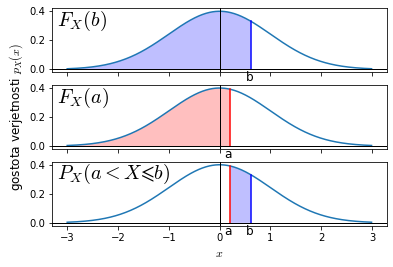

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True)
ax2.set_ylabel(r'gostota verjetnosti $p_X(x)$', fontsize=12)
plt.xlabel(r'$x$', fontsize=12)
ax1.plot(X,px)
ax2.plot(X,px)
ax3.plot(X,px)
a=0.2
b=0.61
ax1.fill_between(X, px, 0, where=(X < b), facecolor='blue', alpha=0.25)
ax1.plot([b,b],[0,px_normal(b,sigma,avg)], color='blue')
ax2.fill_between(X, px, 0, where=(X < a), facecolor='red', alpha=0.25)
ax2.plot([a,a],[0,px_normal(a,sigma,avg)], color='red')
ax3.fill_between(X, px, 0, where=((X > a) & (X <= b)), facecolor='blue', alpha=0.25)
ax3.plot([a,a],[0,px_normal(a,sigma,avg)], color='red')
ax3.plot([b,b],[0,px_normal(b,sigma,avg)], color='blue')
ax1.axhline(0, color='black', lw=1)
ax2.axhline(0, color='black', lw=1)
ax3.axhline(0, color='black', lw=1)
ax1.axvline(0, color='black', lw=1)
ax2.axvline(0, color='black', lw=1)
ax3.axvline(0, color='black', lw=1)
#ax.axvline(a, color='blue', lw=2, alpha=0.5)
#ax.axvline(b, color='blue', lw=2, alpha=0.5)
ax1.annotate('b',xy=(a,0), xytext=(b-0.1,-0.08), fontsize=12)
ax2.annotate('a',xy=(a,0), xytext=(a-0.1,-0.08), fontsize=12)
ax3.annotate('b',xy=(a,0), xytext=(b-0.1,-0.08), fontsize=12)
ax3.annotate('a',xy=(a,0), xytext=(a-0.1,-0.08), fontsize=12)

ax1.annotate(r'${F_X}( b )$',xy=(0,0), xytext=(-3.2,0.3), fontsize=20)
ax2.annotate(r'${F_X}( a )$',xy=(0,0), xytext=(-3.2,0.3), fontsize=20)
ax3.annotate(r'${P_X}(a < X \leqslant b )$',xy=(0,0), xytext=(-3.2,0.3), fontsize=20)


In [5]:
%matplotlib widget
def px_normal(x,sigma,avg):
    return 1/(sigma*sqrt(2*pi))*exp(-1/2*((x-avg)/sigma)**2)
    
sigma=1
avg=0
a=0

#Izracunaj tabelo vrednosti za risanje grafa
dx=6*sigma/1e3
X=arange(-3*sigma+avg,3*sigma+avg,dx)
px=list()
Fx=[0]
Xf=list()
for x in X:
    px.append(px_normal(x,sigma,avg))
    if (x<=a):
        Xf.append(x)
        Fx.append(Fx[-1]+px[-1]*dx)
del Fx[1]

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
ax1.set_ylabel(r'$p_X(x)$', fontsize=12)
ax2.set_ylabel(r'$F_X(x)$', fontsize=12)
ax2.set_ylim(0,1.1)
plt.xlabel(r'$x$', fontsize=12)
ax1.plot(X,px)
Fxline, = ax2.plot(Xf,Fx)
fill = ax1.fill_between(X, px, 0, where=(X < a), facecolor='blue', alpha=0.25)
vline, = ax1.plot([a,a],[0,px_normal(a,sigma,avg)], color='blue')
ax1.axhline(0, color='black', lw=1)
ax2.axhline(0, color='black', lw=1)
ax1.axvline(0, color='black', lw=1)
ax2.axvline(0, color='black', lw=1)
ax1.annotate('x',xy=(a,0), xytext=(a-0.1,-0.08), fontsize=12)
val=ax1.annotate('{:.2f}'.format(Fx[-1]),xy=(a,0), xytext=(a-0.5,0.01), fontsize=12)

def update_plot(w=0.0):
    global fill, vline, val, X, px, Fx, Xf, Fxline
    fill.remove()    
    fill = ax1.fill_between(X, px, 0, where=(X < w), facecolor='blue', alpha=0.25)
    vline.set_xdata([w,w])
    vline.set_ydata([0,px_normal(w,sigma,avg)])
    px.clear()
    Fx=[0]
    Xf.clear()
    for x in X:
        px.append(px_normal(x,sigma,avg))
        if (x<=w):
            Xf.append(x)
            Fx.append(Fx[-1]+px[-1]*dx)
    del Fx[1]
    val.set_text('{:.2f}'.format(Fx[-1]))
    Fxline.set_data(Xf,Fx)
    val.set_position((w-0.5,0.01))

interact(update_plot,w=(-3.0,3.0));


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='w', max=3.0, min=-3.0), Output()), _dom_classes=('wi…

# Normalna porazdelitev

Text(0.5, 0, '$x$')

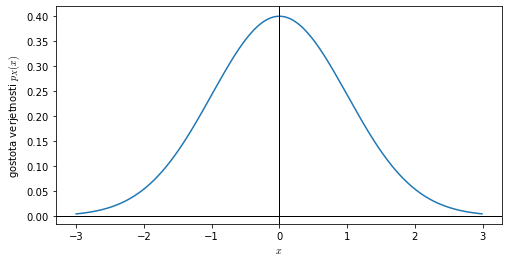

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X,px)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
plt.ylabel(r'gostota verjetnosti $p_X(x)$')
plt.xlabel(r'$x$')

# Enakomerna porazdelitev

In [29]:
def px_unf(x,xmin,xmax):
    if (x > xmin) and (x<= xmax):
        return 1/(xmax-xmin)
    else:
        return 0
    
xmin = -1
xmax = 1
#Izracunaj tabelo vrednosti za risanje grafa
Xu=arange(1.5*xmin,1.5*xmax,(xmax-xmin)/1000)
pxu=list()
for x in Xu:
    pxu.append(px_unf(x,xmin,xmax))
    
#Risi
%matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(Xu,pxu)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
plt.ylabel(r'gostota verjetnosti $p_X(x)$')
plt.xlabel(r'$x$')

Using matplotlib backend: Qt5Agg


Text(0.5, 0, '$x$')

# Laplaceova porazdelitev

In [16]:
def px_laplace(x,stdev,xavg):
    return 1/(sigma*sqrt(2))*exp(-sqrt(2)*(abs(x-avg)/sigma))
    
sigma = 1
avg = 0
#Izracunaj tabelo vrednosti za risanje grafa
Xl=arange(-3*sigma+avg,3*sigma+avg,0.01)
pxl=list()
for x in Xl:
    pxl.append(px_laplace(x,sigma,avg))
    
#Risi
%matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(Xl,pxl)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
plt.ylabel(r'gostota verjetnosti $p_X(x)$')
plt.xlabel(r'$x$')

Using matplotlib backend: Qt5Agg


Text(0.5, 0, '$x$')

# Rayleighova porazdelitev

In [27]:
def px_rayleigh(x,stdev):
    if (x<0):
        return 0
    else:
        return x/(sigma**2)*exp(-1/2*(x/sigma)**2)
    
sigma = 1
#Izracunaj tabelo vrednosti za risanje grafa
Xr=arange(-1/3*sigma,3*sigma,sigma/1000)
pxr=list()
for x in Xr:
    pxr.append(px_rayleigh(x,sigma))
    
#Risi
%matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(Xr,pxr)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
plt.ylabel(r'gostota verjetnosti $p_X(x)$')
plt.xlabel(r'$x$')

Using matplotlib backend: Qt5Agg


Text(0.5, 0, '$x$')